In [1]:
import darts 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NaiveSeasonal
from darts.models.forecasting.linear_regression_model import LinearRegressionModel
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing
from darts.models.forecasting.arima import ARIMA
from darts.models.forecasting.random_forest import RandomForest
from darts.models.forecasting.theta import Theta
from darts.models.forecasting.regression_ensemble_model import RegressionEnsembleModel
from darts.models.forecasting.nbeats import NBEATSModel


from darts.metrics.metrics import mape ,mse,r2_score

import re

Importing plotly failed. Interactive plots will not work.


In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [5]:
data2 = pd.read_csv("beer.csv")
print(data2.head())


     Month  Monthly beer production
0  1956-01                     93.2
1  1956-02                     96.0
2  1956-03                     95.2
3  1956-04                     77.1
4  1956-05                     70.9


In [6]:
data_ts = TimeSeries.from_dataframe(data2,time_col="Month",value_cols="Monthly beer production")

In [9]:
traindata, testdata = data_ts.split_before(pd.Timestamp('1978-10'))

In [10]:
from darts.models import ExponentialSmoothing

beer_model = ExponentialSmoothing()

beer_model.fit(traindata)

<AxesSubplot:>

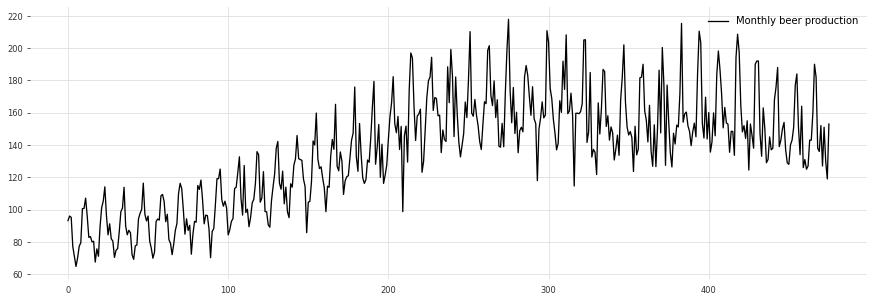

In [11]:
data2.plot(figsize=(15,5))

### Plotting ,selecting and decribing

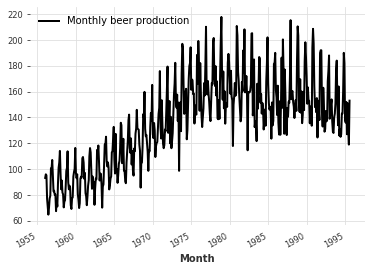

In [12]:
col = "Monthly beer production"
data_ts[col].plot()

In [14]:
# valid_ts = data_ts.drop_before(pd.Timestamp['1988-01'])
train, test = data_ts.split_before(pd.Timestamp('1978-10'))

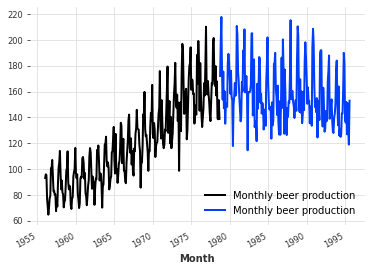

In [15]:
train.plot()
test.plot()

### Classical Model

In [22]:
model0 = Theta(seasonality_period=12)
model1 = LinearRegressionModel(lags=12)
model2 = ExponentialSmoothing(seasonal_periods=12)
model3 = ARIMA(p=12,d=1,q=12)
model4 = RandomForest(lags=12,n_estimators=300)

models = {
    "Theta":model0,
    "Linear Regression":model1,
    "Exponential Smoothing":model2,
    "ARIMA":model3,
    "Random Forest":model4
}

Theta
Linear Regression
Exponential Smoothing
ARIMA


C:\Users\iamka\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\iamka\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\iamka\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Forest


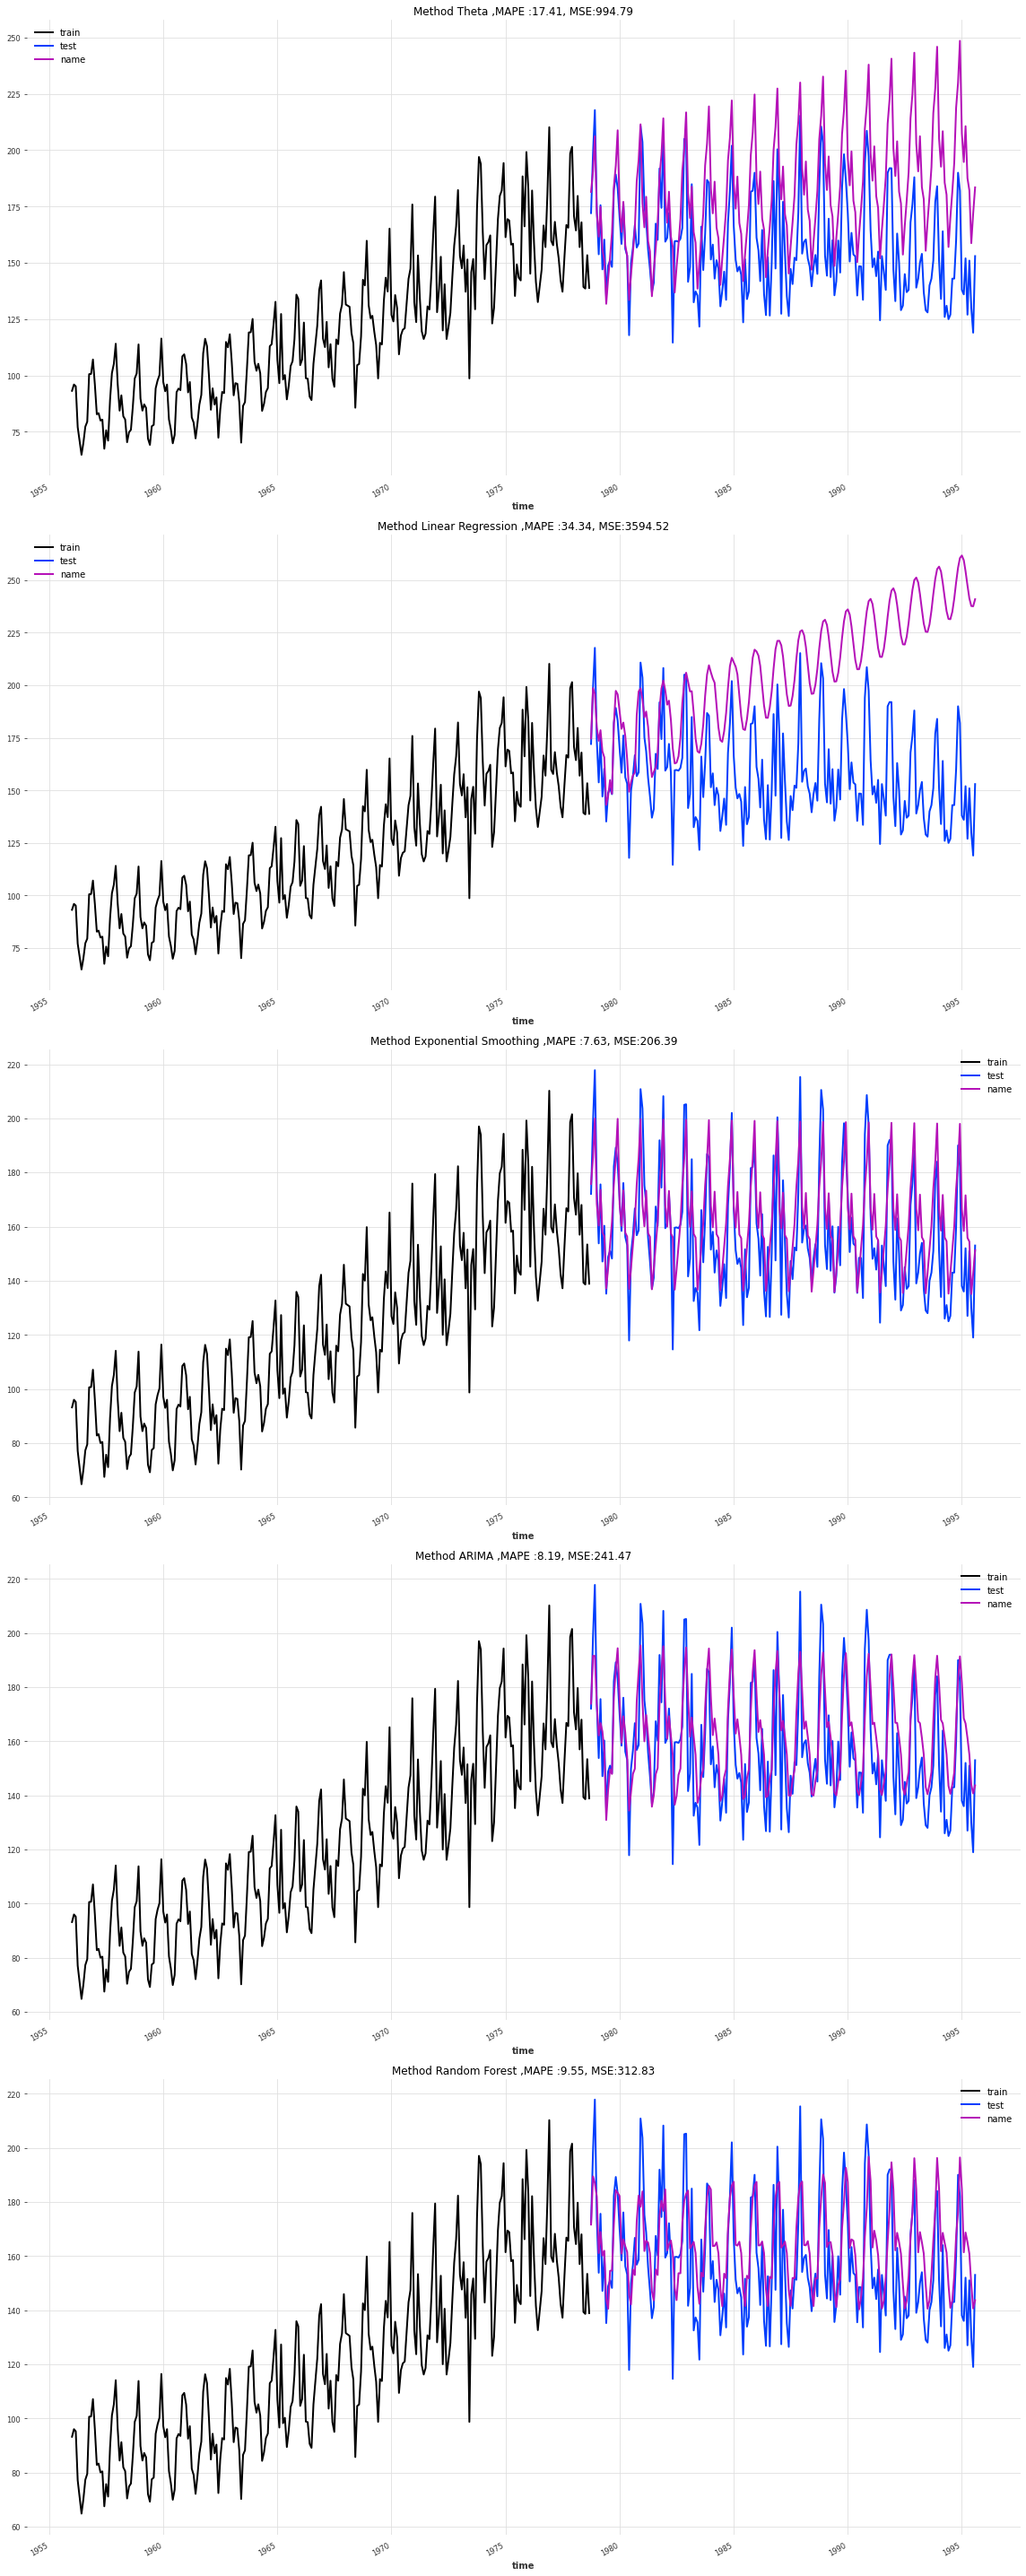

In [30]:
fig = plt.figure(figsize=(16,40))
for i,(name,model) in enumerate(models.items()):
    print(name)
    model.fit(series=train)
    predictions = model.predict(n=len(test))
    mape_score = round(mape(test,predictions),2)
    mse_score = round(mse(test,predictions),2)
#     r2_score = round(r2_score(test,predictions),2)
    
    fig.add_subplot(5,1,i+1)
    
    train.plot(label='train')
    test.plot(label='test')
    predictions.plot(label='name')
    
    plt.title(f"Method {name} ,MAPE :{mape_score}, MSE:{mse_score}")
    plt.legend()
    
plt.tight_layout()
plt.show()

In [36]:
model5 = NBEATSModel(input_chunk_length=24,output_chunk_length=4,num_stacks=7,
                    num_blocks=1,num_layers=5,layer_widths=32,n_epochs=200,batch_size=12)

[2022-01-17 21:47:52,189] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 246 samples.
[2022-01-17 21:47:52,189] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 246 samples.
[2022-01-17 21:47:52,204] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-01-17 21:47:52,204] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


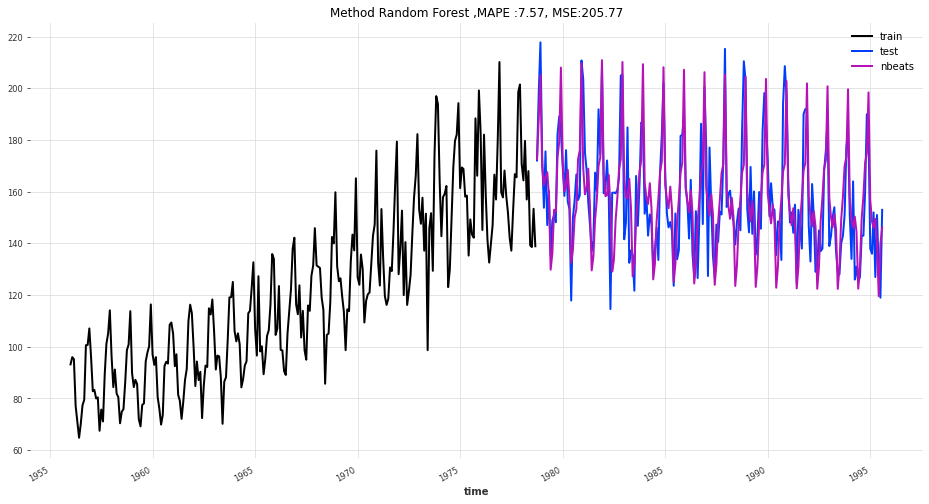

In [37]:
fig = plt.figure(figsize=(16,8))
model5.fit(series=train)
predictions = model5.predict(n=len(test))
mape_score = round(mape(test,predictions),2)
mse_score = round(mse(test,predictions),2)

train.plot(label='train')
test.plot(label='test')
predictions.plot(label='nbeats')

plt.title(f"Method {name} ,MAPE :{mape_score}, MSE:{mse_score}")
plt.legend()